# ML - KNN Algorithm
Mohammad Mahdi Salmani

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## 1. Create KNN class.

In [2]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = []

        for sample in X_test:
            distances = np.linalg.norm(self.X_train - sample, axis=1)
            nearest_neighbors = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[nearest_neighbors]

            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]

            predictions.append(predicted_label)

        return np.array(predictions)

## 2. Load dataset and pre-process

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

In [4]:
print("Data scale: ", iris.data.shape)
print("Feature names: ", iris.feature_names)
print("Target names: ", iris.target_names)
print("Data info:")

Data scale:  (150, 4)
Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']
Data info:


In [5]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


* Draw scatter plot.

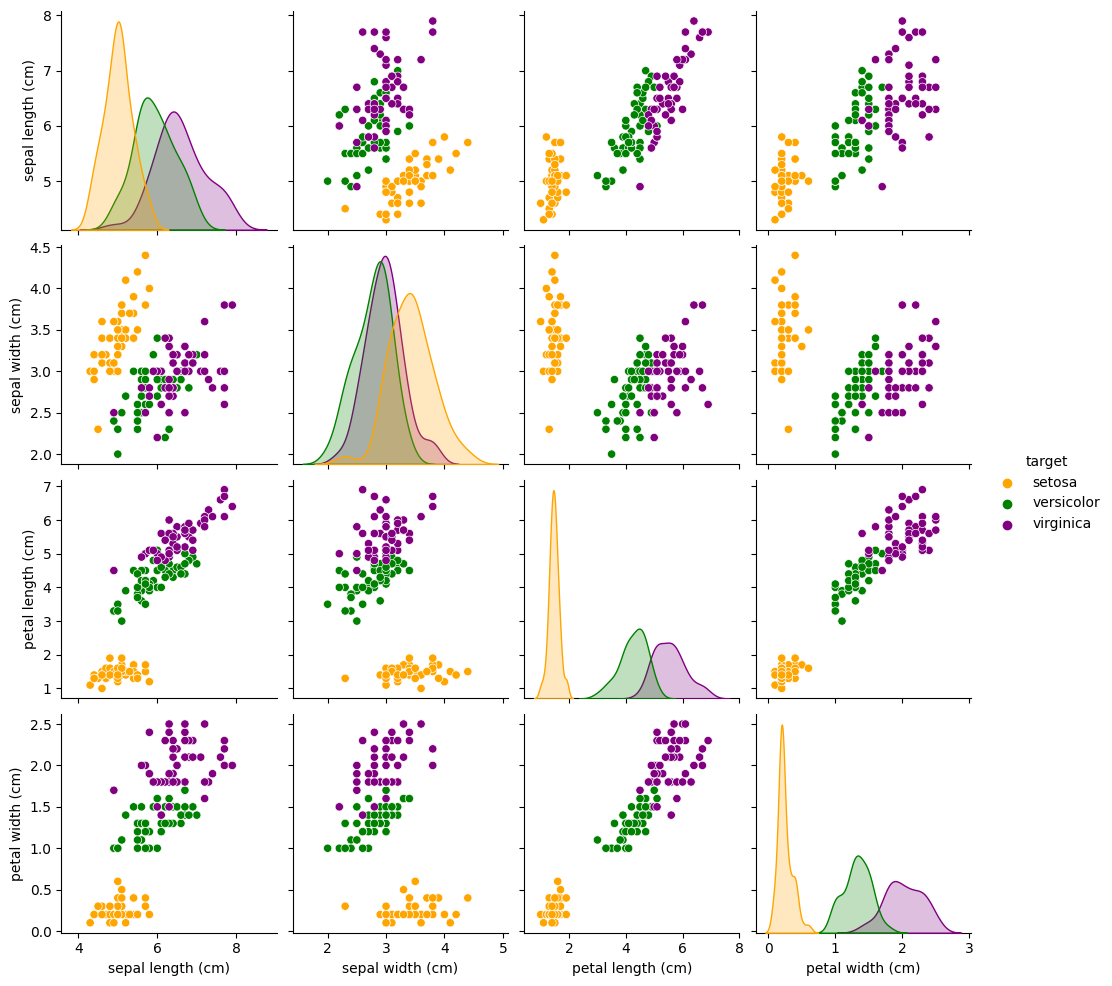

In [7]:
# Convert to DataFrame for easier plotting
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

# Use seaborn's pairplot for a scatter plot matrix
vis_iris = iris_df.copy()
vis_iris['target'].replace({0:'setosa', 1:'versicolor', 2:'virginica'}, inplace=True)
palette = {'setosa': 'orange', 'versicolor': 'green', 'virginica': 'purple'}
sns.pairplot(vis_iris, hue="target", palette=palette)
plt.show()

* Split the dataset into training and testing sets.


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

## 3. Train, Prediction, Evaluation

In [16]:
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the KNN classifier
knn_classifier = KNN(k=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions
y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTrain accuracy:\t{accuracy:.2f}")
accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest accuracy:\t{accuracy:.2f}")
print("\nTest classification report:\n")
print(classification_report(y_test, y_test_pred, target_names = iris.target_names))


Train accuracy:	0.98

Test accuracy:	0.93

Test classification report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.83      0.91        12
   virginica       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



## 4. Accuracy for each K

In [20]:
accuracies = np.zeros(10)

for _ in range(1000):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)
    for i in range(10):
        # Instantiate the KNN classifier
        knn_classifier = KNN(k=i + 1)
        # Train the classifier
        knn_classifier.fit(X_train, y_train)
        # Make predictions
        predictions = knn_classifier.predict(X_test)
        # Calculate accuracy
        accuracy = accuracy_score(y_test, predictions)
        accuracies[i] += accuracy

# Calculate mean of accuracies for each K
accuracies /= 1000

[0.95721053 0.946      0.96068421 0.95715789 0.96260526 0.95971053
 0.96431579 0.96202632 0.96592105 0.96292105]


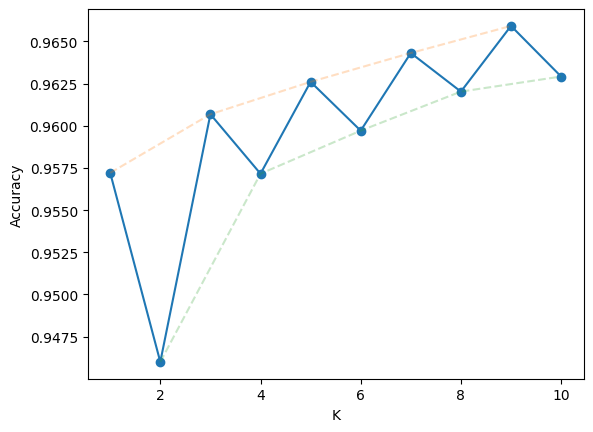

In [21]:
print(accuracies)
plt.plot(range(1, 11), accuracies, marker="o")
plt.plot(range(1, 11, 2), accuracies[::2], linestyle="dashed", alpha= 0.25)
plt.plot(range(2, 11, 2), accuracies[1::2], linestyle="dashed", alpha= 0.25)

plt.ylabel("Accuracy")
plt.xlabel("K")
plt.show()

Report best K:

In [22]:
print("Best K =", np.argmax(accuracies) + 1)

Best K = 9
